Name:Ankit Gaidhar



Roll_no:D2_28



Practical_5_3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
null_values=df.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
df.drop('fbs',axis=1,inplace=True)

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


<Axes: >

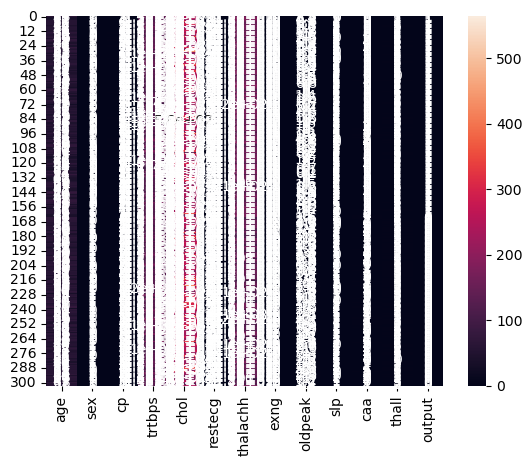

In [ ]:
sns.heatmap(df,annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
X =df.drop(['output'],axis='columns')  # Your feature data
y =df.drop(['age','sex','cp','trtbps','chol','restecg','thalachh','exng','oldpeak','slp','caa','thall'],axis='columns')# Your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\diwas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diwas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
print(accuracy)

0.8688524590163934


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
print(cm)

[[25  4]
 [ 4 28]]


In [ ]:
len(y_test)

61

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,predictions)

0.47413793103448276